In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/housing.csv')

In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

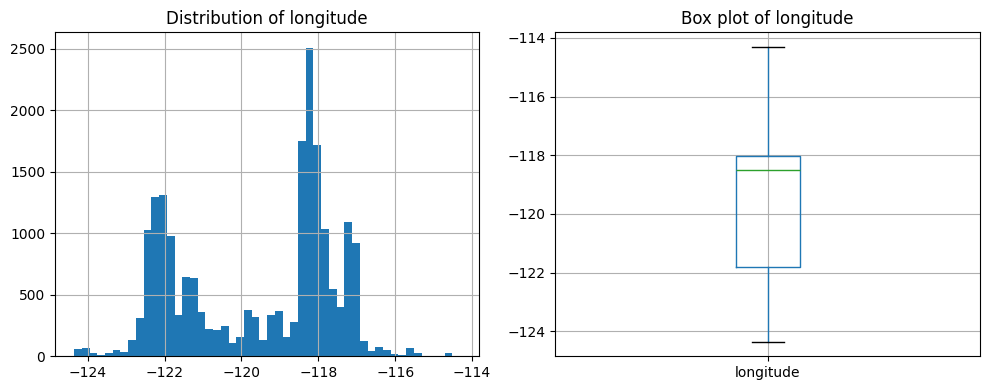

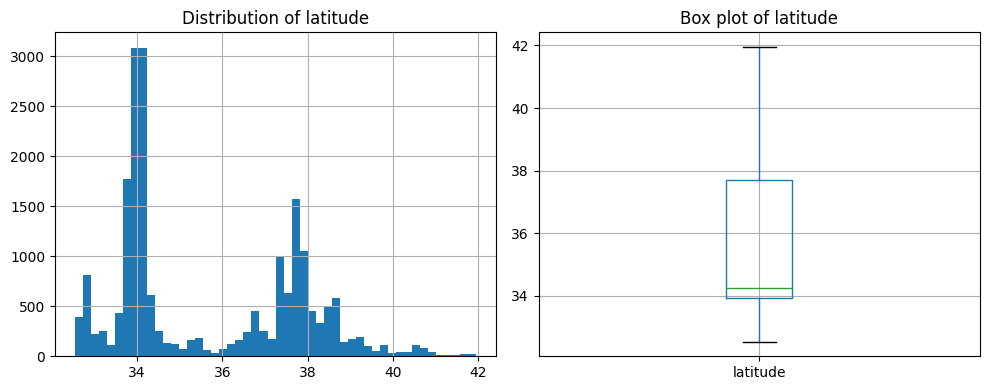

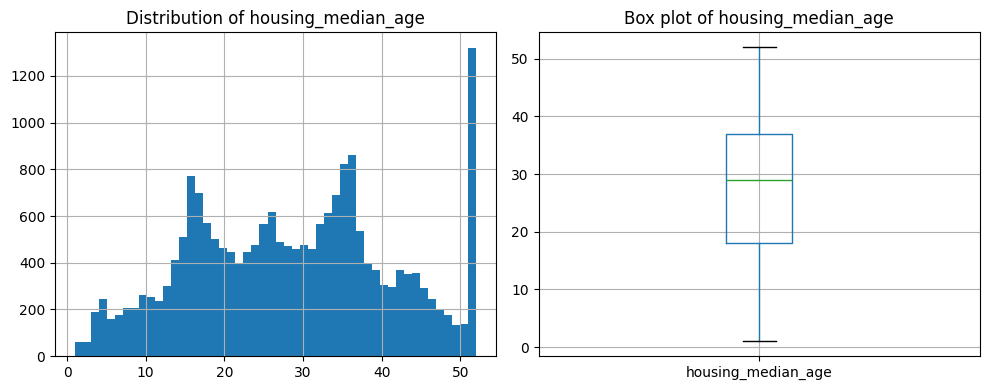

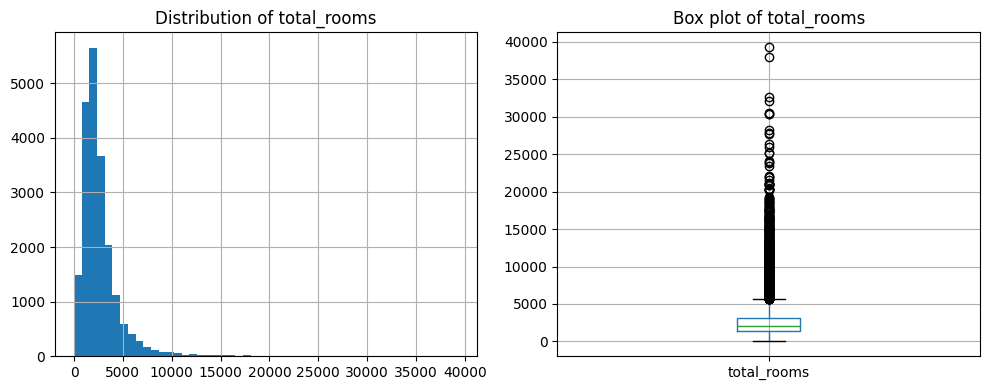

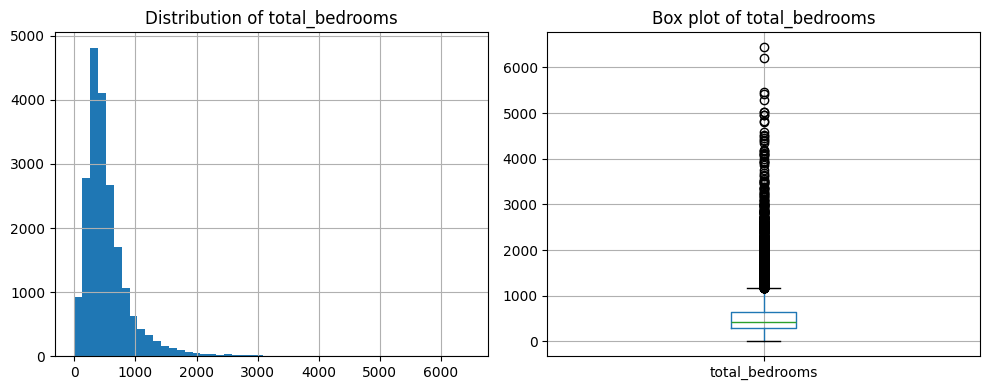

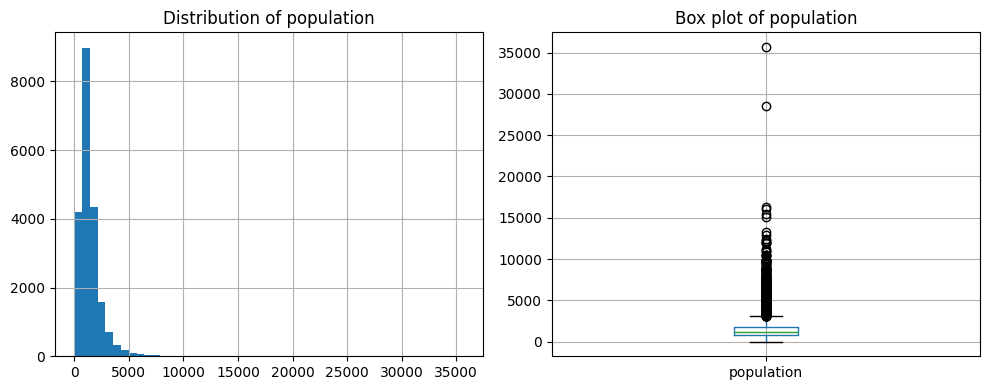

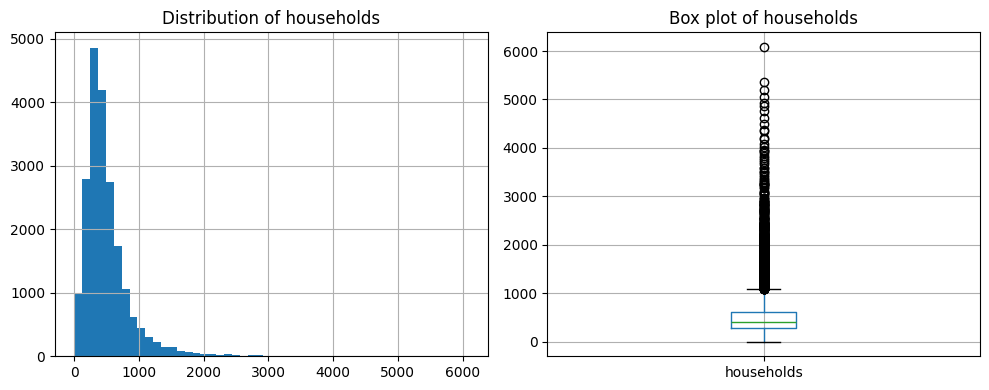

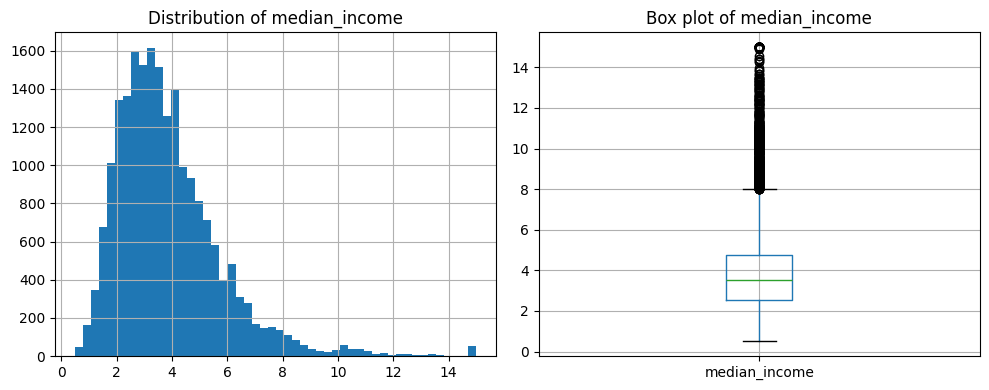

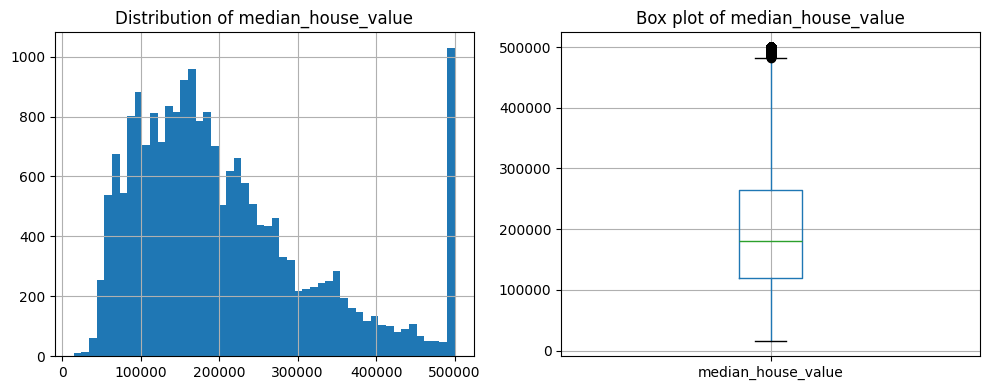

In [4]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    df.boxplot(column=col)
    plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

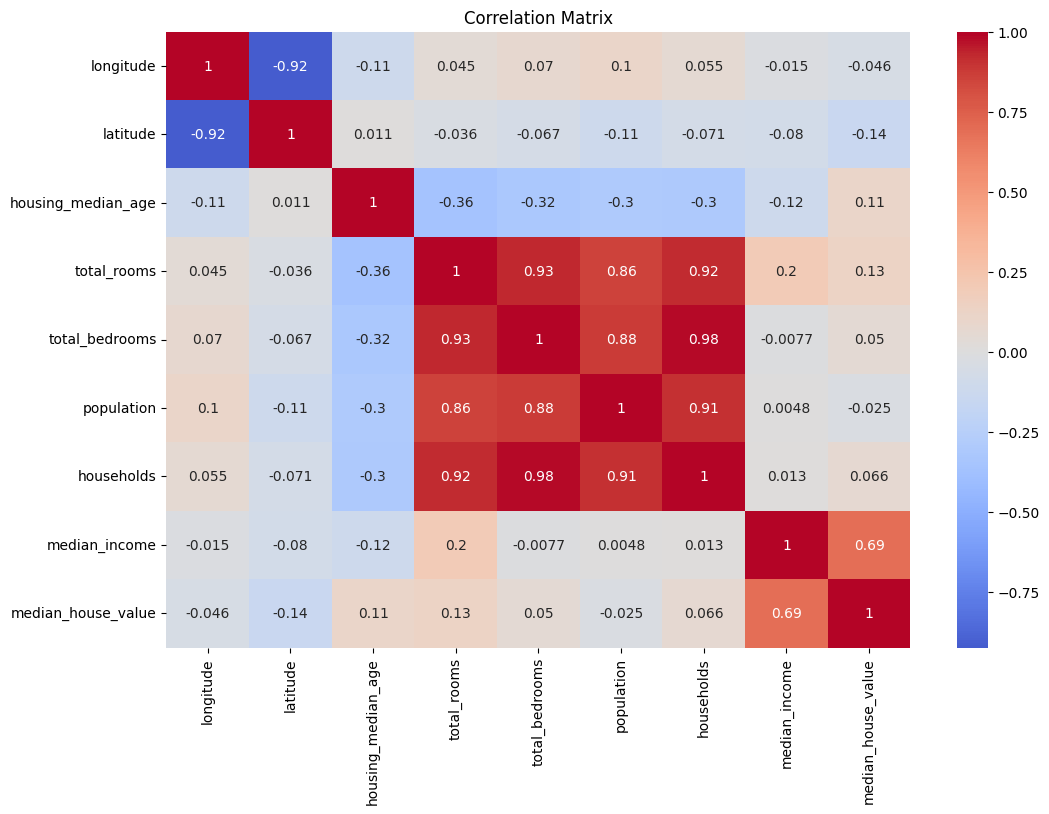

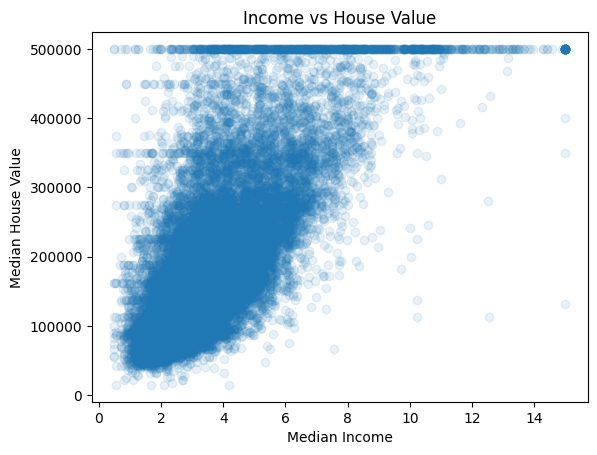

In [5]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for key relationships
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')
plt.show()

OUTLIER DETECTION ANALYSIS

Feature                   Outliers     Percentage   Lower Bound     Upper Bound    
----------------------------------------------------------------------
longitude                 0            0.00        % -127.48         -112.33        
latitude                  0            0.00        % 28.26           43.38          
housing_median_age        0            0.00        % -10.50          65.50          
total_rooms               1287         6.24        % -1102.62        5698.38        
total_bedrooms            1271         6.16        % -230.50         1173.50        
population                1196         5.79        % -620.00         3132.00        
households                1220         5.91        % -207.50         1092.50        
median_income             681          3.30        % -0.71           8.01           
median_house_value        1071         5.19        % -98087.50       482412.50      

VISUALIZING OUTLIERS IN KEY FEATURES


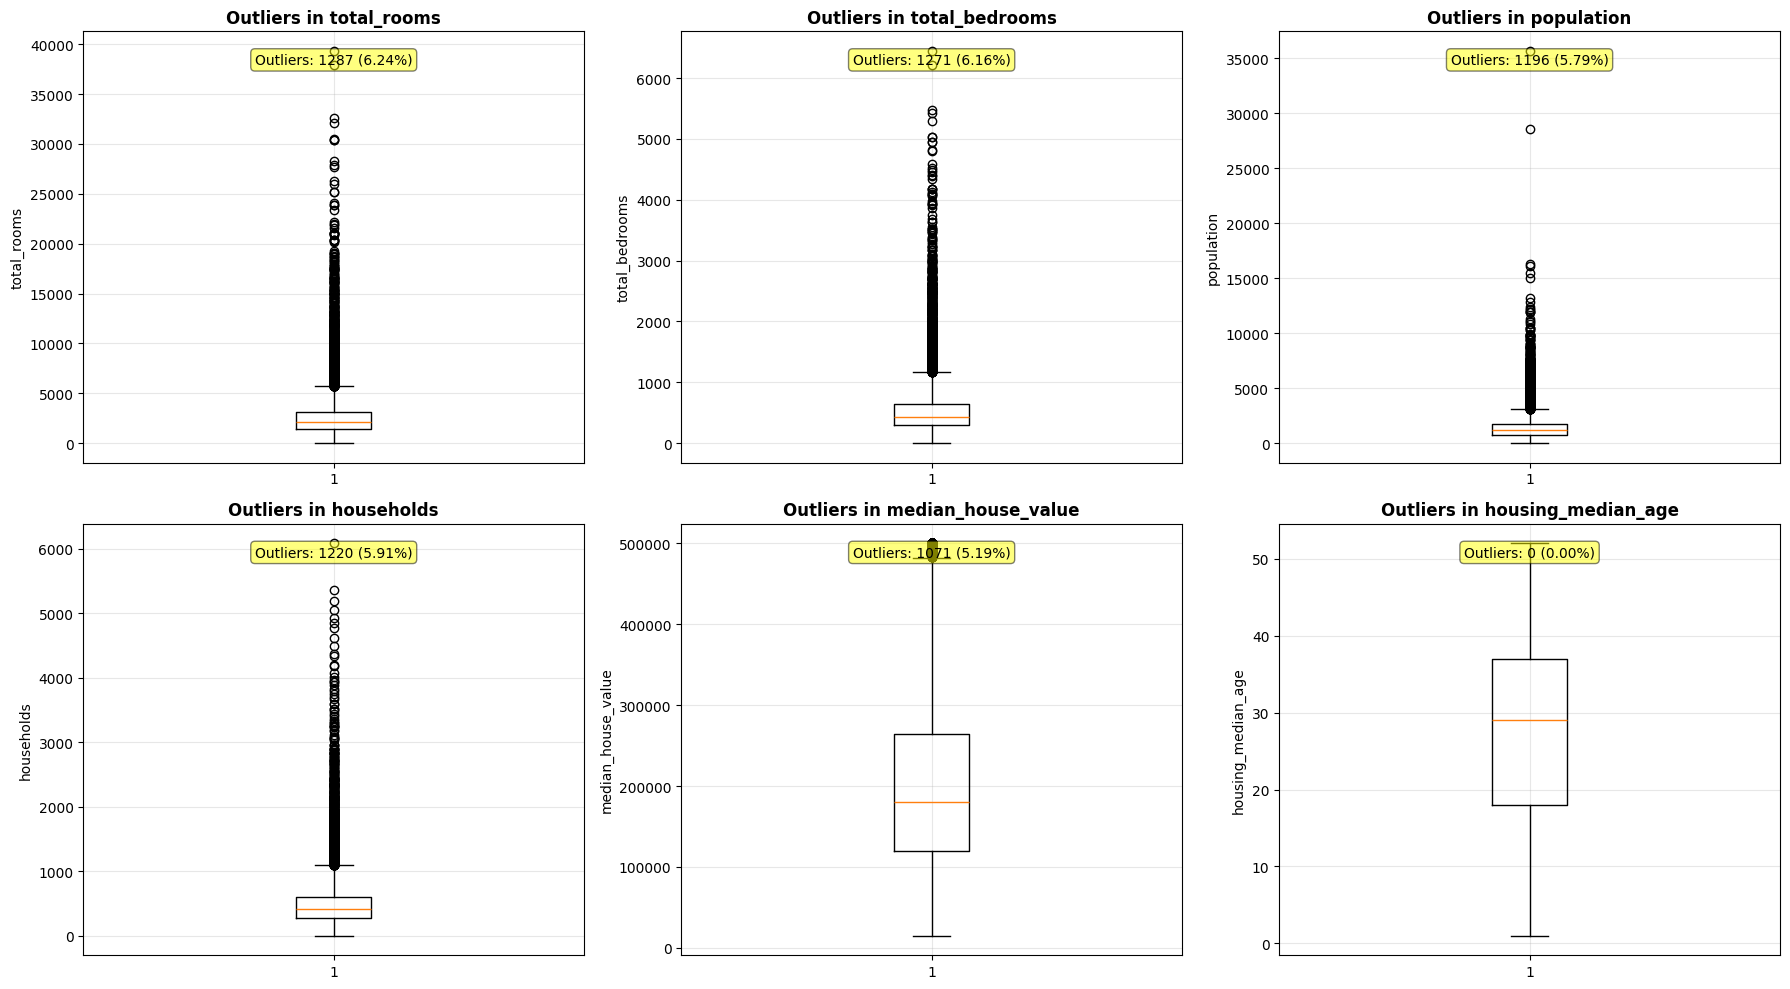


ROWS WITH OUTLIERS IN MULTIPLE FEATURES
Rows with outliers in 1 feature: 1201
Rows with outliers in 2+ features: 1818
Rows with outliers in 3+ features: 1082
Rows with outliers in 4+ features: 752

OUTLIER DETECTION SUMMARY
Total outlier instances across all features: 6726

Features with most outliers:
  - total_rooms: 1287 outliers (6.24%)
  - total_bedrooms: 1271 outliers (6.16%)
  - households: 1220 outliers (5.91%)
  - population: 1196 outliers (5.79%)
  - median_house_value: 1071 outliers (5.19%)


In [6]:
# Outlier Detection using IQR Method
print("="*70)
print("OUTLIER DETECTION ANALYSIS")
print("="*70)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Dictionary to store outlier information
outlier_stats = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_stats[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage
    }

# Display outlier statistics
print(f"\n{'Feature':<25} {'Outliers':<12} {'Percentage':<12} {'Lower Bound':<15} {'Upper Bound':<15}")
print("-"*70)
for col, stats in outlier_stats.items():
    print(f"{col:<25} {stats['Outlier Count']:<12} {stats['Outlier Percentage']:<12.2f}% "
          f"{stats['Lower Bound']:<15.2f} {stats['Upper Bound']:<15.2f}")

# Visualize outliers for key features
print("\n" + "="*70)
print("VISUALIZING OUTLIERS IN KEY FEATURES")
print("="*70)

# Select features with significant outliers
features_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 
                    'median_house_value', 'housing_median_age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot):
    if col in numerical_cols:
        # Box plot
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(f'Outliers in {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
        
        # Add outlier count as text
        outlier_count = outlier_stats[col]['Outlier Count']
        axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_stats[col]["Outlier Percentage"]:.2f}%)',
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Identify rows with outliers in multiple features
print("\n" + "="*70)
print("ROWS WITH OUTLIERS IN MULTIPLE FEATURES")
print("="*70)

# Create a mask for outliers in each feature
outlier_mask = pd.DataFrame()
for col in numerical_cols:
    stats = outlier_stats[col]
    outlier_mask[col] = (df[col] < stats['Lower Bound']) | (df[col] > stats['Upper Bound'])

# Count outliers per row
outlier_mask['outlier_count'] = outlier_mask.sum(axis=1)
rows_with_multiple_outliers = outlier_mask[outlier_mask['outlier_count'] > 1]

print(f"Rows with outliers in 1 feature: {len(outlier_mask[outlier_mask['outlier_count'] == 1])}")
print(f"Rows with outliers in 2+ features: {len(outlier_mask[outlier_mask['outlier_count'] >= 2])}")
print(f"Rows with outliers in 3+ features: {len(outlier_mask[outlier_mask['outlier_count'] >= 3])}")
print(f"Rows with outliers in 4+ features: {len(outlier_mask[outlier_mask['outlier_count'] >= 4])}")

# Summary
print("\n" + "="*70)
print("OUTLIER DETECTION SUMMARY")
print("="*70)
total_outliers = sum([stats['Outlier Count'] for stats in outlier_stats.values()])
print(f"Total outlier instances across all features: {total_outliers}")
print(f"\nFeatures with most outliers:")
sorted_features = sorted(outlier_stats.items(), key=lambda x: x[1]['Outlier Count'], reverse=True)
for col, stats in sorted_features[:5]:
    print(f"  - {col}: {stats['Outlier Count']} outliers ({stats['Outlier Percentage']:.2f}%)")


In [2]:
# Summary and Insights
print("="*70)
print("KEY FINDINGS FROM EDA")
print("="*70)
print("\n1. DATA QUALITY:")
print("   - Missing values: 207 missing values in 'total_bedrooms' (1% of data)")
print("   - Data types: 9 numerical features, 1 categorical (ocean_proximity)")
print("   - Total records: 20,640 housing districts")

print("\n2. OUTLIERS:")
if 'outlier_stats' in locals() or 'outlier_stats' in globals():
    # Get top 3 features with most outliers
    sorted_features = sorted(outlier_stats.items(), key=lambda x: x[1]['Outlier Count'], reverse=True)[:3]
    for col, stats in sorted_features:
        print(f"   - {col}: {stats['Outlier Count']} outliers ({stats['Outlier Percentage']:.2f}% of data)")
else:
    print("   - Outliers detected in multiple features (see outlier detection cell above)")

print("\n3. CORRELATIONS:")
print("   - Strong correlation (0.69) between 'median_income' and 'median_house_value'")
print("   - This suggests income is the strongest predictor of house prices")

print("\n4. DISTRIBUTIONS:")
print("   - Right-skewed distributions in: total_rooms, total_bedrooms, population")
print("   - Target variable (median_house_value) capped at $500,000")
print("   - Median income ranges from 0.5 to 15 (scaled by 10,000)")

print("\n5. RECOMMENDATIONS:")
print("   - Handle missing values using median imputation")
print("   - Consider outlier treatment for features with >5% outliers")
print("   - Feature engineering needed (ratios, interactions)")
print("   - Target variable capping may limit model performance for high-value properties")

KEY FINDINGS FROM EDA

1. DATA QUALITY:
   - Missing values: 207 missing values in 'total_bedrooms' (1% of data)
   - Data types: 9 numerical features, 1 categorical (ocean_proximity)
   - Total records: 20,640 housing districts

2. OUTLIERS:
   - Outliers detected in multiple features (see outlier detection cell above)

3. CORRELATIONS:
   - Strong correlation (0.69) between 'median_income' and 'median_house_value'
   - This suggests income is the strongest predictor of house prices

4. DISTRIBUTIONS:
   - Right-skewed distributions in: total_rooms, total_bedrooms, population
   - Target variable (median_house_value) capped at $500,000
   - Median income ranges from 0.5 to 15 (scaled by 10,000)

5. RECOMMENDATIONS:
   - Handle missing values using median imputation
   - Consider outlier treatment for features with >7% outliers
   - Feature engineering needed (ratios, interactions)
   - Target variable capping may limit model performance for high-value properties
